In [3]:
import pandas as pd
import json
# Load the dataset from JSON files
with open('/Users/advait/Desktop/gitpositories/SC4001-Assignment-2/Text-Emotion-Recognition/emo2019/emo-train.json') as file:
    train_data = pd.DataFrame(json.load(file))
    
with open('/Users/advait/Desktop/gitpositories/SC4001-Assignment-2/Text-Emotion-Recognition/emo2019/emo-test.json') as file:
    test_data = pd.DataFrame(json.load(file))

# Rename 'Label' to 'sentiment' for consistency with the original code
train_data.rename(columns={'Label': 'sentiment', 'text': 'content'}, inplace=True)
test_data.rename(columns={'Label': 'sentiment', 'text': 'content'}, inplace=True)

# drop all rows whose sentiment is others
train_data = train_data[train_data.sentiment != 'others']
test_data = test_data[test_data.sentiment != 'others']

# combine the train and test data
data = pd.concat([train_data, test_data])

In [4]:
train_data.value_counts('sentiment')

sentiment
angry    5506
sad      5463
happy    4243
Name: count, dtype: int64

## Dataset looks quite balanced

/var/folders/lv/l4xn1q3s7jxgwb_811k8vqrh0000gn/T/ipykernel_27002/1666428637.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y="sentiment", data=data, palette="Set2")


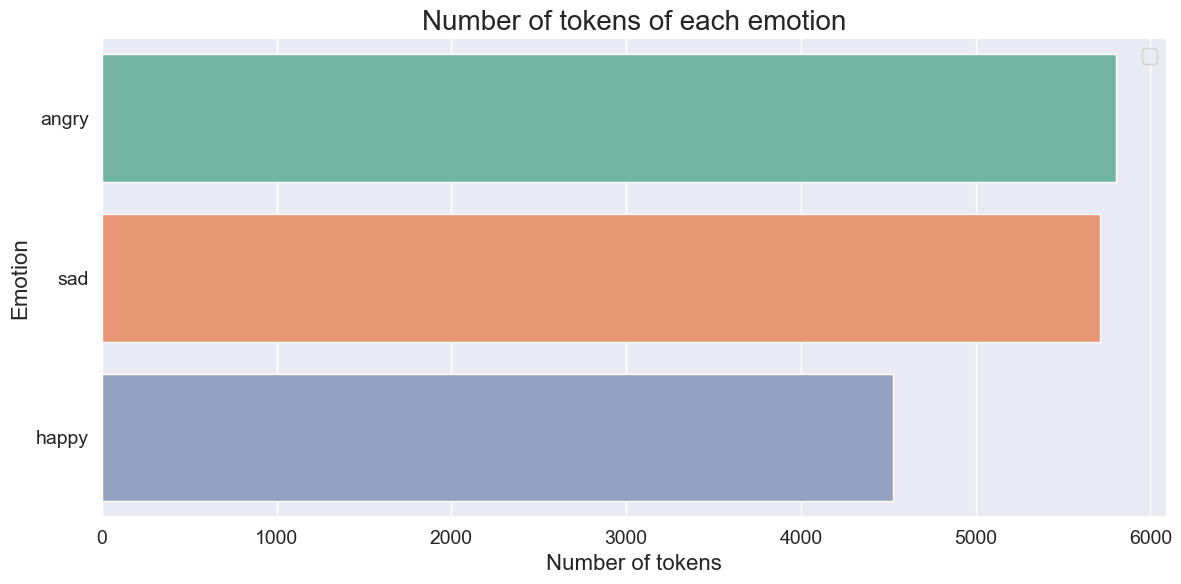

In [ ]:
# visualise the dataset using a nice looking chart

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

# Plot the number of tokens of each emotion
plt.figure(figsize=(12, 6))
ax = sns.countplot(y="sentiment", data=data, palette="Set2")
plt.title('Number of tokens of each emotion', fontsize=20)
plt.xlabel('Number of tokens', fontsize=16)
plt.ylabel('Emotion', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add a legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=14)

# Add a border
for spine in ax.spines.values():
    spine.set_visible(True)

plt.tight_layout()
plt.show()
